In [13]:
!pip install latex
!apt install texlive-latex-recommended texlive-latex-extra 
!apt install texlive-fonts-recommended texlive-fonts-extra

'apt' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.


In [65]:
pip install pylatex

  Created wheel for pylatex: filename=PyLaTeX-1.4.1-cp37-none-any.whl size=42828 sha256=b19433efca68d6f97bd9a8e3412de14917f9386b93ccb2a9c192e620cfddcc2b
  Stored in directory: C:\Users\user1\AppData\Local\pip\Cache\wheels\a2\25\3a\2cc0a6219d95ce34f1f7439a6427c62ca262ebaeb5969db89f
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8213 sha256=84e66d97b548903f640c86f9d8378099564328dac2f24756b206292ce1ff6548
  Stored in directory: C:\Users\user1\AppData\Local\pip\Cache\wheels\e1\c6\9b\651d8a21d59b51a75ab9c070838f9231b8126421bc0569af47
Successfully built pylatex ordered-set
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sb
#sb.set()

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Load historical prices

In [3]:
def load_data():
    symbols = [ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT']
    total_shares = { 'AAPL': 4443265000, 'MSFT': 7628805618, 'MMM': 575050655, 'AMZN': 495797220,
           'GOOG': 689687449, 'JPM': 3136484924, 'BBT': 766303490 }
    
    n = len(symbols)
    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('%s.csv' % s, index_col=None, parse_dates=['Date'])
        prices = list(dataframe['Close'])[-504:-252] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(total_shares[s] * np.r_[prices]) # cap mishe tedade kole sahm * gheimata
    return symbols, prices_out, np.array(caps_out)

names, prices, caps = load_data()
n = len(names)

In [5]:
pd.DataFrame(caps)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,7.510895e+11,7.415365e+11,7.469573e+11,7.664632e+11,7.742389e+11,7.767271e+11,7.830810e+11,7.814815e+11,7.761051e+11,7.729948e+11,...,9.828058e+11,9.598341e+11,9.744524e+11,9.804064e+11,9.896484e+11,9.557019e+11,9.766297e+11,9.610782e+11,9.430386e+11,9.477484e+11
1,6.345641e+11,6.345641e+11,6.412011e+11,6.418877e+11,6.444052e+11,6.428794e+11,6.450918e+11,6.415062e+11,6.398280e+11,6.402857e+11,...,8.445851e+11,8.277254e+11,8.289460e+11,8.363459e+11,8.246739e+11,7.805794e+11,8.261997e+11,8.159770e+11,7.922514e+11,7.913360e+11
2,1.323709e+11,1.323652e+11,1.335440e+11,1.335383e+11,1.324399e+11,1.322904e+11,1.321639e+11,1.313358e+11,1.307953e+11,1.312381e+11,...,1.166950e+11,1.152287e+11,1.149239e+11,1.157922e+11,1.107260e+11,1.061198e+11,1.063786e+11,1.063556e+11,1.068387e+11,1.091504e+11
3,5.479948e+11,5.472015e+11,5.425112e+11,5.511282e+11,5.556201e+11,5.568646e+11,5.616788e+11,5.598195e+11,5.579454e+11,5.598394e+11,...,9.081666e+11,8.779180e+11,8.746012e+11,8.871300e+11,8.769165e+11,8.251057e+11,8.835950e+11,8.145007e+11,7.629724e+11,7.587780e+11
4,7.011639e+11,7.072745e+11,7.073296e+11,7.120885e+11,7.075504e+11,7.126747e+11,7.171715e+11,7.112471e+11,7.090469e+11,7.074469e+11,...,7.694773e+11,7.503592e+11,7.562147e+11,7.594563e+11,7.612011e+11,7.246615e+11,7.556008e+11,7.389794e+11,7.035364e+11,7.146610e+11
5,3.155618e+11,3.165341e+11,3.186355e+11,3.180709e+11,3.160949e+11,3.097279e+11,3.062464e+11,3.062150e+11,3.058387e+11,3.069364e+11,...,3.444801e+11,3.390226e+11,3.384581e+11,3.335965e+11,3.301150e+11,3.239675e+11,3.288918e+11,3.243753e+11,3.288604e+11,3.346629e+11
6,3.773279e+10,3.797034e+10,3.800099e+10,3.796268e+10,3.791670e+10,3.695882e+10,3.659099e+10,3.582469e+10,3.534958e+10,3.562545e+10,...,3.656034e+10,3.699713e+10,3.748757e+10,3.607757e+10,3.609289e+10,3.529594e+10,3.602393e+10,3.561779e+10,3.660632e+10,3.699713e+10


In [6]:
pd.DataFrame(prices)

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,169.039993,166.889999,168.110001,172.500000,174.250000,174.809998,176.240005,175.880005,174.669998,173.970001,...,221.190002,216.020004,219.309998,220.649994,222.729996,215.089996,219.800003,216.300003,212.240005,213.300003
1,83.180000,83.180000,84.050003,84.139999,84.470001,84.269997,84.559998,84.089996,83.870003,83.930000,...,110.709999,108.500000,108.660004,109.629997,108.099998,102.320000,108.300003,106.959999,103.849998,103.730003
2,230.190002,230.179993,232.229996,232.220001,230.309998,230.050003,229.830002,228.389999,227.449997,228.220001,...,202.929993,200.380005,199.850006,201.360001,192.550003,184.539993,184.990005,184.949997,185.789993,189.809998
3,1105.280029,1103.680054,1094.219971,1111.599976,1120.660034,1123.170044,1132.880005,1129.130005,1125.349976,1129.170044,...,1831.729980,1770.719971,1764.030029,1789.300049,1768.699951,1664.199951,1782.170044,1642.810059,1538.880005,1530.420044
4,1016.640015,1025.500000,1025.579956,1032.479980,1025.900024,1033.329956,1039.849976,1031.260010,1028.069946,1025.750000,...,1115.689941,1087.969971,1096.459961,1101.160034,1103.689941,1050.709961,1095.569946,1071.469971,1020.080017,1036.209961
5,100.610001,100.919998,101.589996,101.410004,100.779999,98.750000,97.639999,97.629997,97.510002,97.860001,...,109.830002,108.089996,107.910004,106.360001,105.250000,103.290001,104.860001,103.419998,104.849998,106.699997
6,49.240002,49.549999,49.590000,49.540001,49.480000,48.230000,47.750000,46.750000,46.130001,46.490002,...,47.709999,48.279999,48.919998,47.080002,47.099998,46.060001,47.009998,46.480000,47.770000,48.279999


## Estimate assets historical return and covariances

In [7]:
# Function takes historical stock prices together with market capitalizations and
# calculates weights, historical returns and historical covariances
def assets_historical_returns_and_covariances(prices):
    prices = matrix(prices)  # create numpy matrix from prices
    # create matrix of historical returns
    rows, cols = prices.shape
    returns = empty([rows, cols - 1])
    for r in range(rows):
        for c in range(cols - 1):
            p0, p1 = prices[r, c], prices[r, c + 1]
            returns[r, c] = (p1 / p0) - 1
    # calculate returns
    expreturns = array([])
    for r in range(rows):
        expreturns = append(expreturns, numpy.mean(returns[r]))
    # calculate covariances
    covars = cov(returns)
    expreturns = (1 + expreturns) ** 252 - 1  # Annualize returns
    covars = covars * 252  # Annualize covariances
    return expreturns, covars

# vase hesab kardan W ham bayad az market cap hamun rooz estefade kard
Wm = array(caps[:,251]) / sum(caps[:,251]) # calculate market weights from capitalizations, to equ beja bazde ma lmb*c*wm 
                                            #mizarim k wm bayad vase roze akhar bashe
R, C = assets_historical_returns_and_covariances(prices) #2vomi mishe tedad roz
rf = 0.02  # Risk-free rate

In [8]:
# Calculates portfolio mean return
def port_mean_return(W, R):
    return sum(R * W)

# Calculates portfolio variance of returns 
def port_var(W, C):
    return dot(dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
    return port_mean_return(W, R), port_var(W, C)


# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
    def fitness(W, R, C, rf):
        # For given level of return r, find weights which minimizes portfolio variance.
        mean, var = port_mean_var(W, R, C) 
        penalty = 100 * abs(
            mean - r)  # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
        return var + penalty
       
    frontier_mean, frontier_var = [], []
    n = len(R)  # Number of assets in the portfolio
    for r in linspace(min(R), max(R), num=21):  # Iterate through the range of returns on Y axis
        W = ones([n]) / n  # start optimization with equal weights
        b_ = [(0, 1) for i in range(n)]
        c_ = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.})
        optimized = so.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)

        #add point to the efficient frontier [x,y] = [optimized.x, r]
        frontier_mean.append(r)
        frontier_var.append(port_var(optimized.x, C))
    return array(frontier_mean), array(frontier_var)

# Given risk-free rate, assets returns and covariances, this function calculates
# weights of tangency portfolio with respect to sharpe ratio maximization
def solve_weights(R, C, rf):
    def fitness(W, R, C, rf):
        mean, var = port_mean_var(W, R, C)  # calculate mean/variance of the portfolio
        util = (mean - rf) / sqrt(var)  # utility = Sharpe ratio
        return 1 / util  # maximize the utility, minimize its inverse value
    n = len(R)
    W = ones([n]) / n  # start optimization with equal weights
    b_ = [(0., 1.) for i in range(n)]  # weights for boundaries between 0%..100%. No leverage, no shorting
    c_ = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.})  # Sum of weights must be 100%
    optimized = so.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
    return optimized.x


def optimize_frontier(R, C, rf):
    W = solve_weights(R, C, rf)
    tan_mean, tan_var = port_mean_var(W, R, C)  # calculate tangency portfolio
    front_mean, front_var = solve_frontier(R, C, rf)  # calculate efficient frontier
    # Weights, Tangency portfolio asset means and variances, Efficient frontier means and variances
    return Result(W, tan_mean, tan_var, front_mean, front_var)


In [9]:
class Result:
    def __init__(self, W, tan_mean, tan_var, front_mean, front_var):
        self.W=W
        self.tan_mean=tan_mean
        self.tan_var=tan_var
        self.front_mean=front_mean
        self.front_var=front_var

In [10]:
def display_assets(names, R, C, color='black'):
    scatter([C[i, i] ** .5 for i in range(n)], R, marker='x', color=color), grid(True)  # draw assets
    for i in range(n): 
        text(C[i, i] ** .5, R[i], '  %s' % names[i], verticalalignment='center', color=color) # draw labels

def display_frontier(result, label=None, color='black'):
    text(result.tan_var ** .5, result.tan_mean, '   tangent', verticalalignment='center', color=color)
    scatter(result.tan_var ** .5, result.tan_mean, marker='o', color=color), grid(True)
    plot(result.front_var ** .5, result.front_mean, label=label, color=color), grid(True)  # draw efficient frontier

In [59]:
plt.style.use('seaborn-white')
plt.rc('font', family='serif', serif='Times')
plt.rc('pdf', fonttype=42)
plt.rc('text', usetex=True)
mpl.use('pdf')
%matplotlib inline

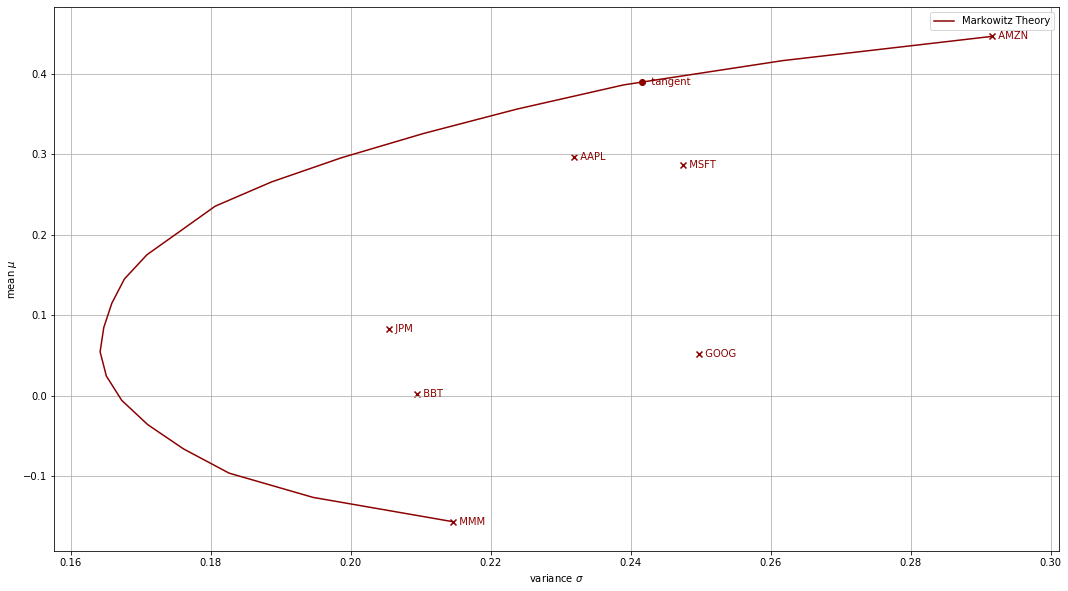

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
Weight of tangent base on Markowitz,0.37555,4.250073e-17,5.052382e-17,0.62445,0.0,0.0,0.0


In [11]:
res1 = optimize_frontier(R, C, rf)

pp.figure(figsize=(18,10))
#pp.xlim(-0.1, 0.35)
display_assets(names, R, C, color='darkred')
display_frontier(res1, label='Markowitz Theory', color='darkred')
#pp.scatter(0, 0.02, color='r')
#pp.plot([0.0, 0.27], [0.02, 0.435])
#pp.style.use('seaborn-white')
#plt.rc('font', family='serif', serif='Times')
#plt.rc('pdf', fonttype=42)
#plt.rc('text', usetex=True)
xlabel('variance $\sigma$'), ylabel('mean $\mu$'),legend(), show() 
display(pd.DataFrame({'Weight of tangent base on Markowitz': res1.W}, index=names).T)
#plt.show()

In [12]:
#import matplotlib.pyplot as plt
import matplotlib as mpl

pp.style.use('seaborn-white')
pp.rc('font', family='serif', serif='Times')
pp.rc('pdf', fonttype=42)
pp.rc('text', usetex=True)
mpl.use('pdf')
%matplotlib inline
x = [1,2,3,4,5]
pp.plot(x, x, '-', color='red')
pp.plot(observed_quantiles, theorical_quantiles, '.', color='black')
pp.show()

NameError: name 'observed_quantiles' is not defined

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001FF582425E8> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [16]:
display(pd.DataFrame(C, columns=names, index=names))

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
AAPL,0.053802,0.036614,0.019728,0.037561,0.037260,0.018282,0.011559
MSFT,0.036614,0.061261,0.029785,0.052080,0.049474,0.026091,0.018818
MMM,0.019728,0.029785,0.046035,0.025461,0.031013,0.024507,0.019770
AMZN,0.037561,0.052080,0.025461,0.085063,0.050847,0.022092,0.013752
GOOG,0.037260,0.049474,0.031013,0.050847,0.062379,0.026377,0.018165
JPM,0.018282,0.026091,0.024507,0.022092,0.026377,0.042206,0.035086
BBT,0.011559,0.018818,0.019770,0.013752,0.018165,0.035086,0.043877


In [17]:
# Calculate portfolio historical return and variance
mean, var = port_mean_var(Wm, R, C)

lmb = (mean - rf) / var  # Calculate risk aversion
Pi = dot(dot(lmb, C), Wm)  # Calculate equilibrium excess returns

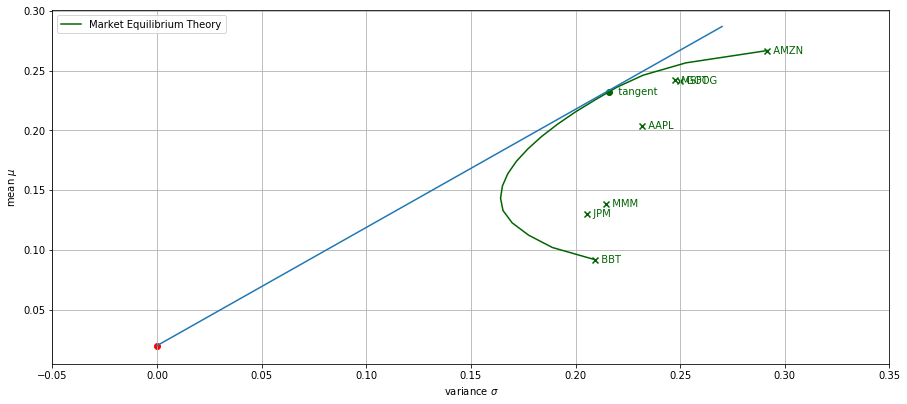

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
Weight of tangent base on market cap (pi),0.246025,0.248463,4.391019e-18,0.225195,0.231561,0.048756,0.0


In [18]:
res2 = optimize_frontier(Pi, C, rf)

pp.figure(figsize=(15,6.5))
pp.xlim(-0.05, 0.35)

display_assets(names, Pi, C, color='darkgreen')
display_frontier(res2, label='Market Equilibrium Theory', color='darkgreen')
pp.scatter(0, 0.02, color='r')
pp.plot([0.0, 0.27], [0.02, 0.287])
xlabel('variance $\sigma$'), ylabel('mean $\mu$'), legend(), show()
display(pd.DataFrame({'Weight of tangent base on market cap (pi)': res2.W}, index=names).T)

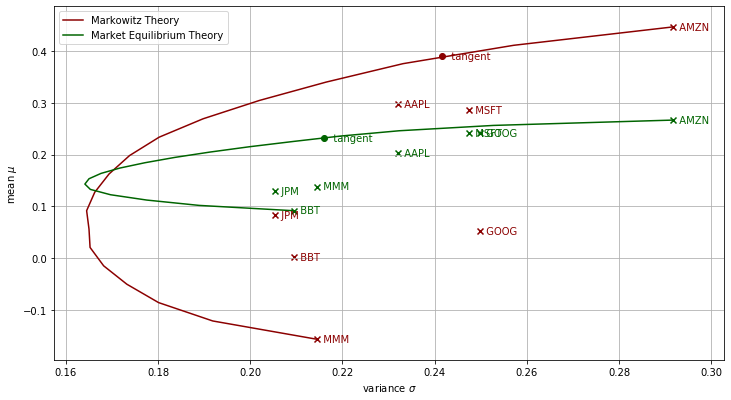

,AAPL,MSFT,MMM,AMZN,GOOG,JPM,BBT
Weight of tangent base on market cap (pi),0.246025,2.484625e-01,4.391019e-18,0.225195,0.231561,0.048756,0.0
Weight of tangent base on Markowitz,0.375550,4.250073e-17,5.052382e-17,0.624450,0.000000,0.000000,0.0


In [19]:
pp.figure(figsize=(12,6.5))


display_assets(names, R, C, color='darkred')
display_frontier(res1, label='Markowitz Theory', color='darkred')
display_assets(names, Pi, C, color='darkgreen')
display_frontier(res2, label='Market Equilibrium Theory', color='darkgreen')
xlabel('variance $\sigma$'), ylabel('mean $\mu$'), legend(), show()
display(pd.DataFrame({'Weight of tangent base on market cap (pi)': res2.W, 'Weight of tangent base on Markowitz': res1.W}, index=names).T)

In [47]:
Wm

array([0.25651567, 0.20992447, 0.02871661, 0.21452855, 0.19171878,
       0.08880114, 0.00979477])

In [16]:
a = res2.W
a

array([2.46773737e-01, 2.37214856e-01, 4.66206934e-18, 2.34825260e-01,
       2.25865102e-01, 5.53210447e-02, 0.00000000e+00])